## Task: Sales Prediction Using Python

## Importing Necessary Libraries

In [ ]:
!pip install -q ydata_profiling

In [ ]:
import warnings as warn
warn.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Data Cleaning

In [ ]:
df = pd.read_csv('/content/advertising.csv')

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

## Exploratory Data Analysis

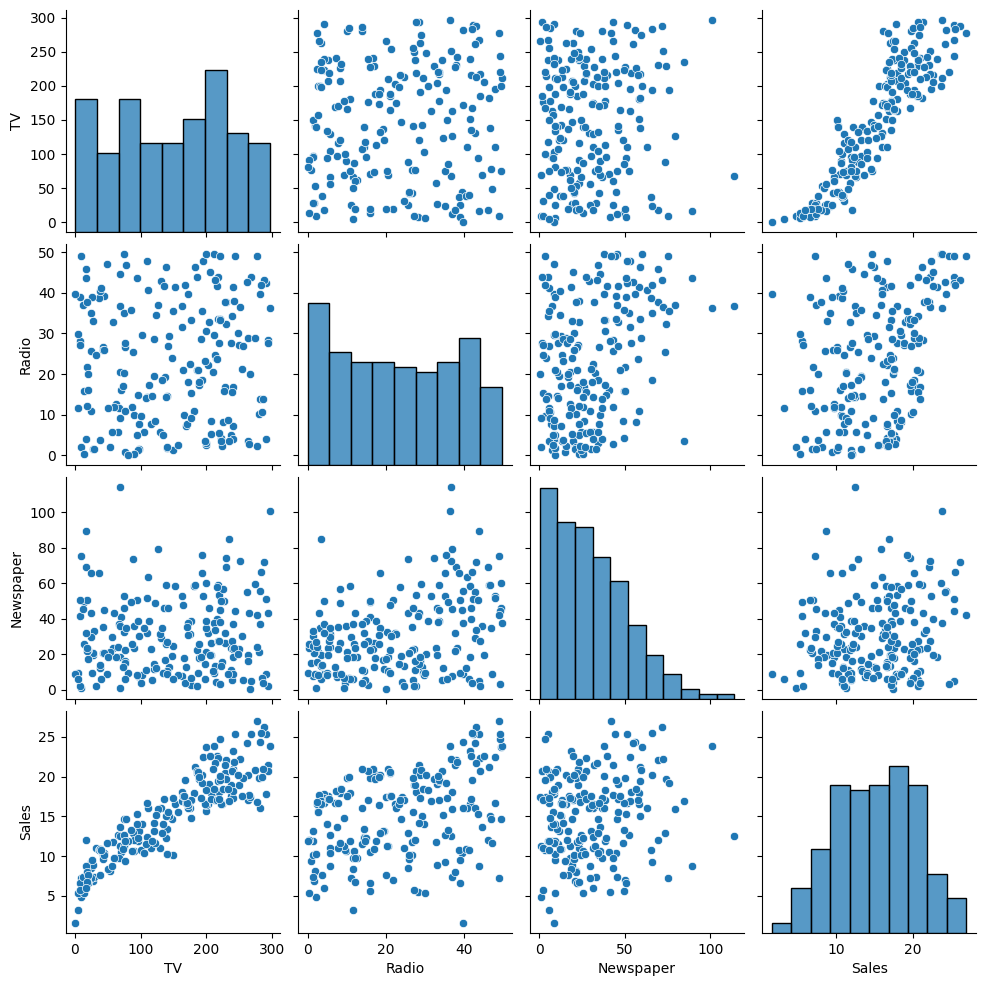

In [ ]:
sns.pairplot(df)
plt.show()

<Axes: >

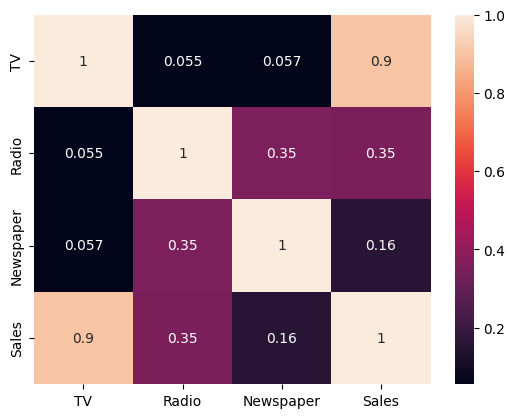

In [ ]:
sns.heatmap(df.corr(),annot=True)

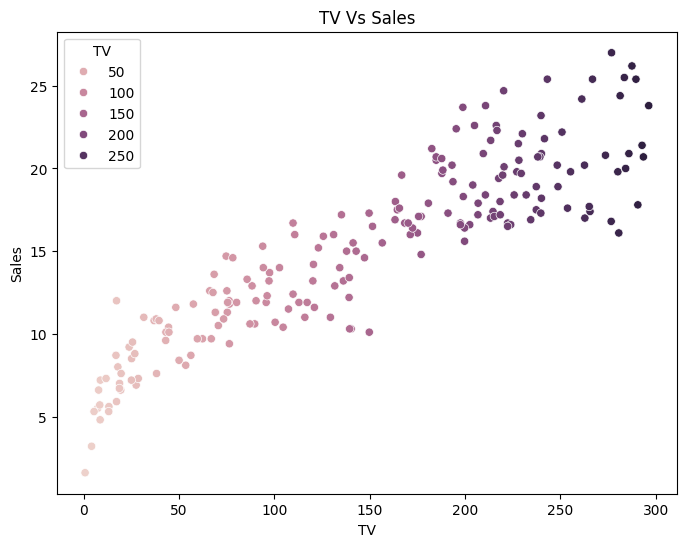

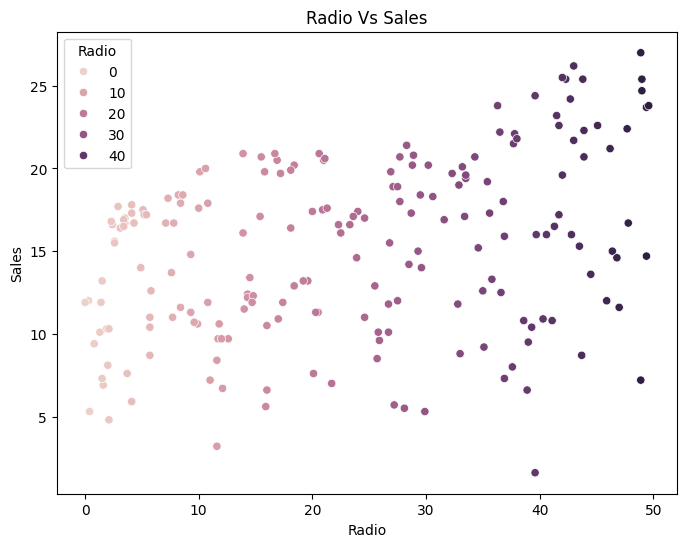

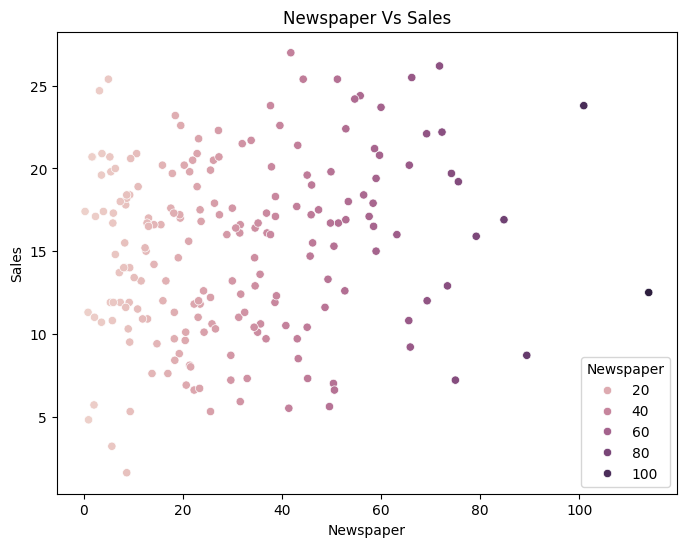

In [ ]:
for col in df.columns:
  if col != 'Sales':
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Sales', hue=col, data=df)
    plt.title(f'{col} Vs Sales')
    plt.show()

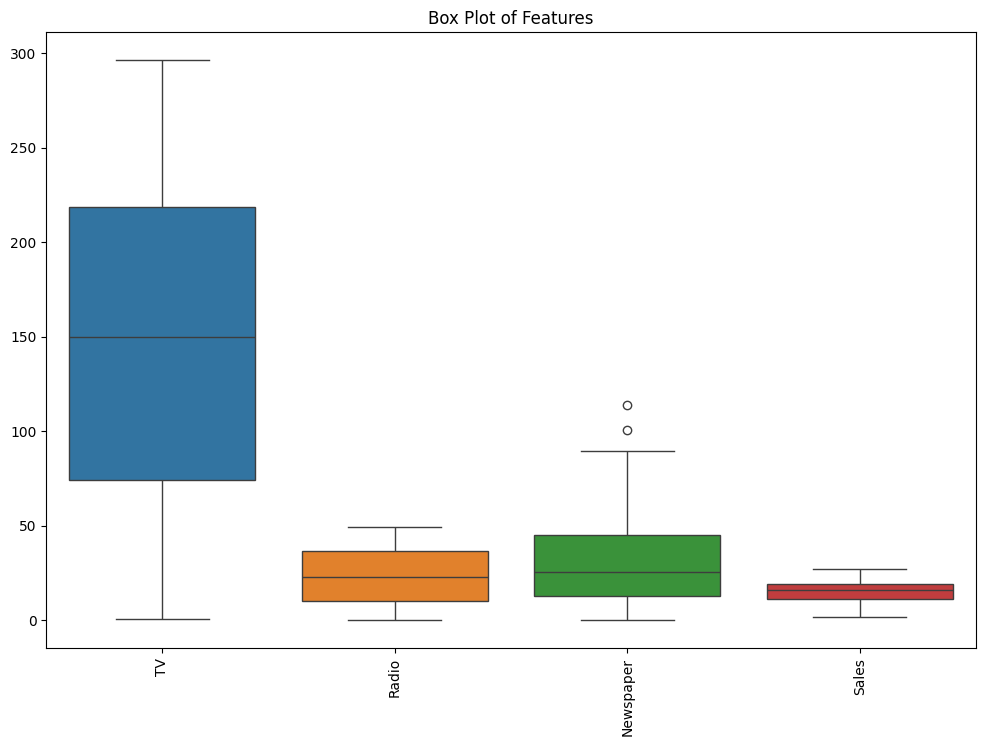

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.xticks(rotation=90)
plt.show()

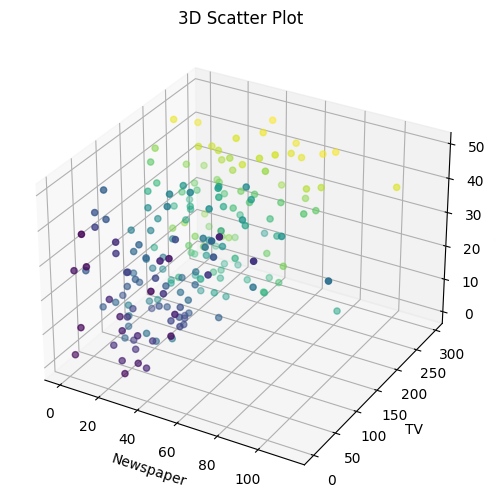

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Newspaper'], df['TV'], df['Radio'],
                     c=df['Sales'].astype('category').cat.codes, cmap='viridis')
ax.set_xlabel('Newspaper')
ax.set_ylabel('TV')
ax.set_zlabel('Radio')
plt.title('3D Scatter Plot')
plt.show()


In [ ]:
ProfileReport(df, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing

In [ ]:
std = StandardScaler()

In [ ]:
scaled_df = pd.DataFrame(std.fit_transform(df.drop('Sales',axis=1)), columns=df.drop('Sales',axis=1).columns)

In [ ]:
df = pd.concat([scaled_df,df.drop(['TV','Radio','Newspaper'],axis=1)],axis=1)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9


## Model Building

In [ ]:
x = df.drop('Sales',axis=1)
y = df['Sales']

In [ ]:
def adjusted_r2_score(y_test,y_pred,n,p):
  return 1 - (((1-r2_score(y_test,y_pred))*(n-1))/(n-p-1))


### Modelling With LinearRegression


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Model Evaluation

In [ ]:
r2_score(y_test,y_pred)

0.9115647723992757

In [ ]:
mean_absolute_error(y_test,y_pred)

1.1199940713361771

In [ ]:
mean_squared_error(y_test,y_pred)

2.40406744471189

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.550505544882665

adjusted_r2_score(y_test,y_pred,len(y_test),df.shape[0])

### Modelling With RandomForestRegressor


In [ ]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Model Evaluation

In [ ]:
r2_score(y_test,y_pred)

0.942647560926263

In [ ]:
mean_absolute_error(y_test,y_pred)

0.9369000000000007

In [ ]:
mean_squared_error(y_test,y_pred)

1.5590973800000016

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.2486382102114293

In [ ]:
adjusted_r2_score(y_test,y_pred,len(y_test),df.shape[0])

1.0186110563881663